In [51]:
#importing libraries 
import pandas as pd 
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
#importing medical cost dataset
df = pd.read_csv('Medical Cost Dataset.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
# Check for missing data in each column
missing_data = df.isnull().sum()
print(missing_data)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [15]:
## Checking for Duplicates ##

# Filter the DataFrame to get the duplicate rows
duplicate_rows = df.duplicated()
duplicated_data = df[duplicate_rows]
duplicated_data

# Count the number of duplicates
num_duplicates = duplicate_rows.sum()
print("Number of duplicates:", num_duplicates)
duplicated_data

Number of duplicates: 1


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [16]:
df[df['charges']==1639.5631]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [19]:
#dropping the duplicated row 
df.drop_duplicates(inplace=True)

In [20]:
## Checking for Duplicates after drop ##

# Count the number of duplicates
num_duplicates = duplicate_rows.sum()
print("Number of duplicates:", num_duplicates)

# Filter the DataFrame to get the duplicate rows
duplicate_rows = df.duplicated()
duplicated_data = df[duplicate_rows]
duplicated_data

Number of duplicates: 0


,age,sex,bmi,children,smoker,region,charges


In [ ]:
## Visualizing the Data ##

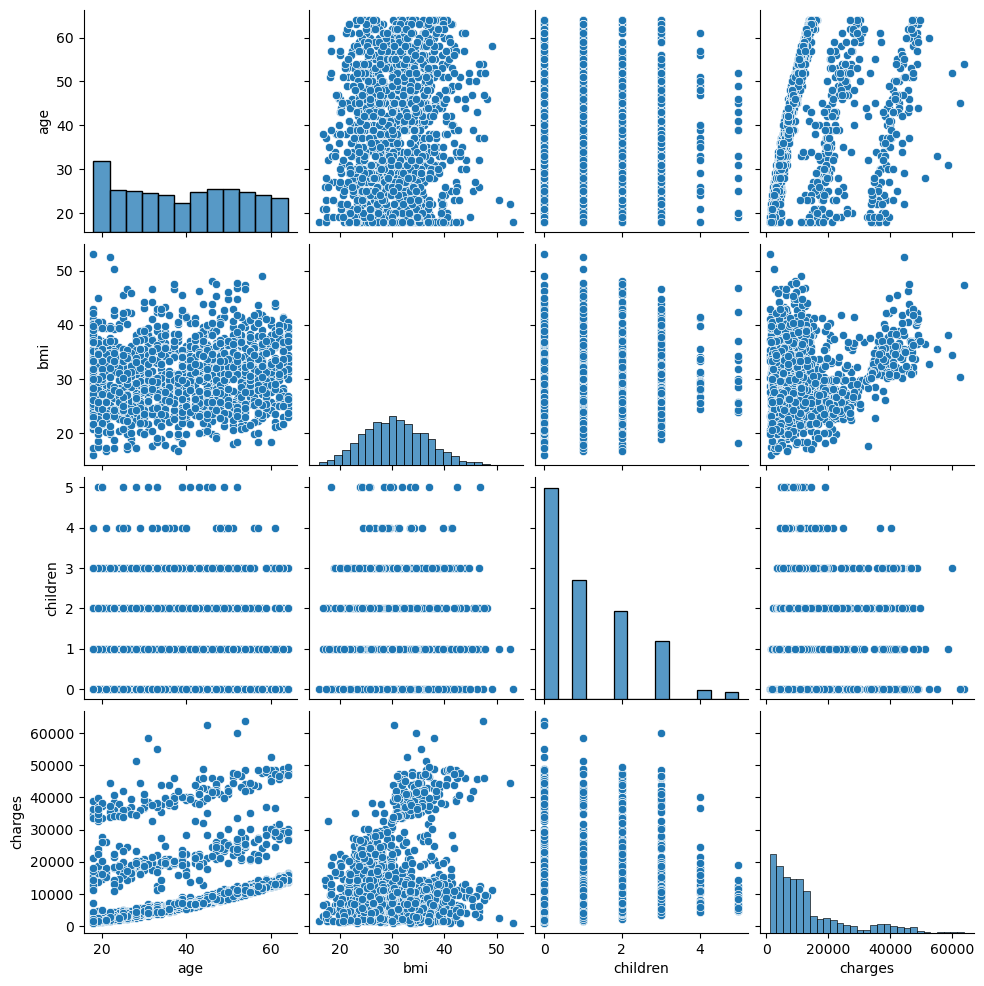

In [95]:
sns.pairplot(df)

In [96]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


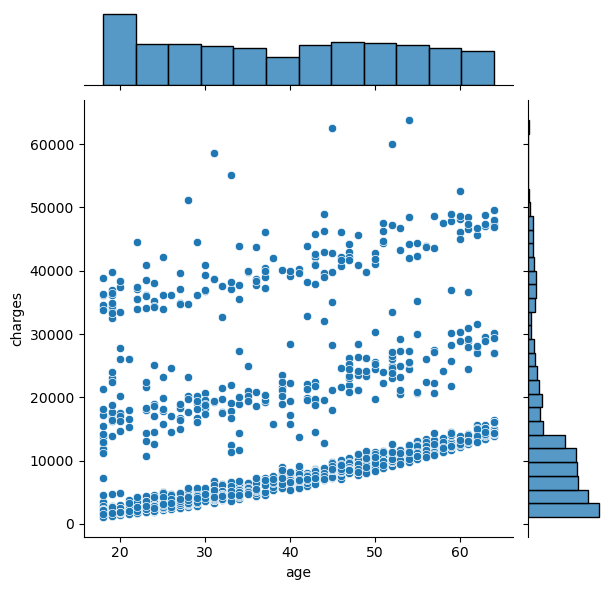

In [97]:
## joint plot with age and charges ##
sns.jointplot(x = 'age', y= 'charges', data = df)

Text(0.5, 1.0, 'Charges per Sex')

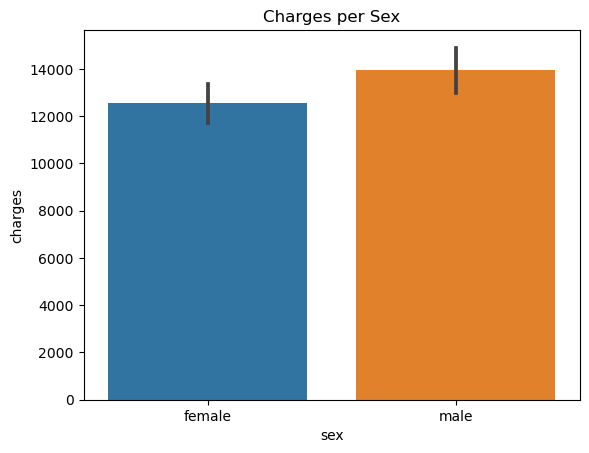

In [25]:
## bar chart with age and gender ##

sns.barplot(x = 'sex', y= 'charges', data = df)
plt.title('Charges per Sex')

In [34]:
#test to see if the difference in male and female averages is statistically significant 
charges_male = df[df['sex'] == 'male']['charges']
charges_female = df[df['sex'] == 'female']['charges']
t_statistic, p_value = stats.ttest_ind(charges_male, charges_female)
print(f'The t statistic is: {t_statistic}')
print(f'The p value is: {p_value}')

significance_level = 0.05

if p_value < significance_level:
    print("The difference in average charges for males and females is statistically significant.")
else:
    print("The difference in average charges for males and females is not statistically significant.")

The t statistic is: 2.124391307062026
The p value is: 0.0338207919951195
The difference in average charges for males and females is statistically significant.


Text(0.5, 1.0, 'Charges per Region')

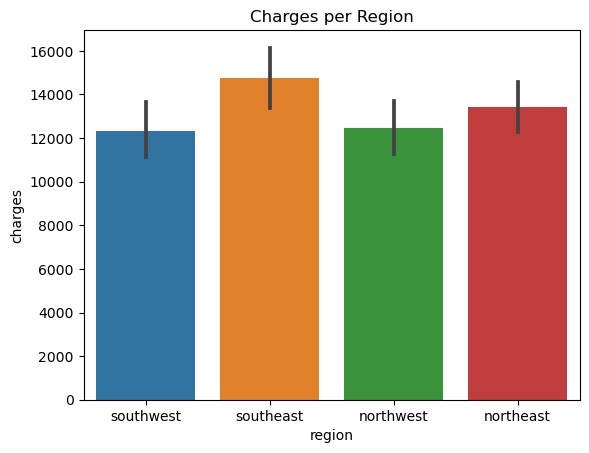

In [32]:
#Visualization of Charges per region
sns.barplot(x = 'region', y= 'charges', data = df)
plt.title('Charges per Region')

In [38]:
charges_southwest = df[df['region'] == 'southwest']['charges']
charges_southeast = df[df['region'] == 'southeast']['charges']
charges_northwest = df[df['region'] == 'northwest']['charges']
charges_northeast = df[df['region'] == 'northeast']['charges']

#one-way ANOVA
f_statistic, p_value = f_oneway(charges_southwest, charges_southeast, charges_northwest, charges_northeast)

significance_level = 0.05

print(f'The f statistic is: {f_statistic}')
print(f'The P-value is: {p_value}')

if p_value > significance_level:
    print("The differences in average charges among regions are not statistically significant.")
else:
    print("There are statistically significant differences in average charges among regions.")

The f statistic is: 2.926139903662776
The P-value is: 0.03276288025444947
There are statistically significant differences in average charges among regions.


Slope of the regression line: 393.8558912099735


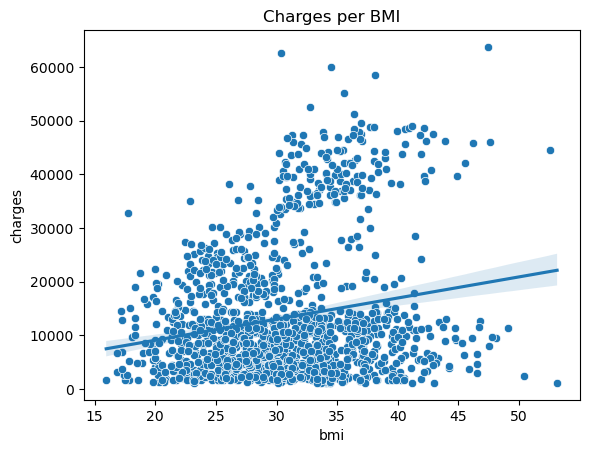

In [49]:
sns.scatterplot(x = 'bmi', y = 'charges', data = df)
sns.regplot(x='bmi', y='charges', data=df, scatter=False)
plt.title('Charges per BMI')

print("Slope of the regression line:", slope)

Text(0.5, 1.0, 'Charges per Smoker Status')

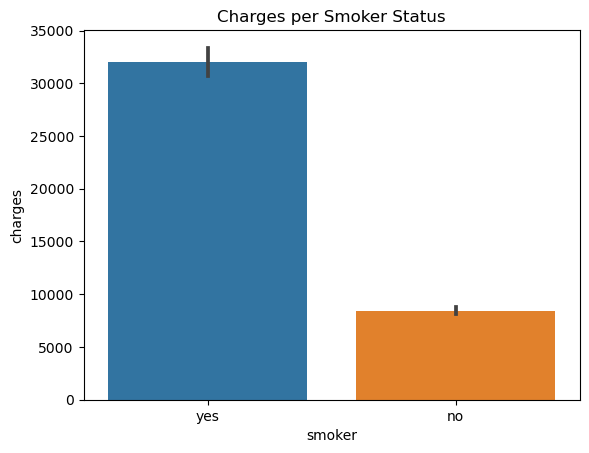

In [100]:
sns.barplot(x = 'smoker', y= 'charges', data = df)
plt.title('Charges per Smoker Status')

In [54]:
# Separate charges for smokers and non-smokers
charges_smoker = df[df['smoker'] == 'yes']['charges']
charges_non_smoker = df[df['smoker'] == 'no']['charges']

#Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(charges_smoker, charges_non_smoker)

significance_level = 0.05

print(f'The u statistic is: {u_statistic}')
print(f'The P-value is: {p_value}')

if p_value < significance_level:
    print("The difference between smokers and non-smokers is statistically significant.")
else:
    print("There is no statistically significant difference between smokers and non-smokers.")

The u statistic is: 283859.0
The P-value is: 5.74701188239214e-130
The difference between smokers and non-smokers is statistically significant.


Text(0.5, 1.0, 'Charges per Number of Children')

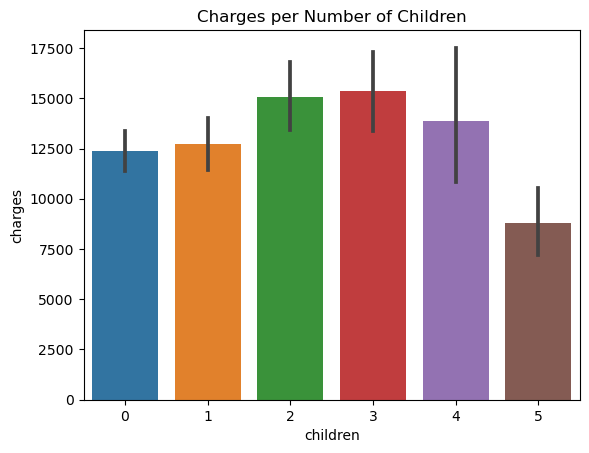

In [56]:
sns.barplot(x = 'children', y='charges', data = df)
plt.title('Charges per Number of Children')

In [55]:
group_0 = df[df['children'] == 0]['charges']
group_1 = df[df['children'] == 1]['charges']
group_2 = df[df['children'] == 2]['charges']
group_3 = df[df['children'] == 3]['charges']
group_4 = df[df['children'] == 4]['charges']
group_5 = df[df['children'] == 5]['charges']

# Perform Kruskal-Wallis test
statistic, p_value = stats.kruskal(group_0, group_1, group_2, group_3, group_4, group_5)


significance_level = 0.05

print(f'The statistic is: {statistic}')
print(f'The P-value is: {p_value}')

if p_value < significance_level:
    print("The difference in costs between the groups is statistically significant.")
else:
    print("There is no statistically significant difference in costs between the groups.")

The statistic is: 29.12066893697647
The P-value is: 2.1957270957731766e-05
The difference in costs between the groups is statistically significant.


Text(0.5, 1.0, 'Age Distribution')

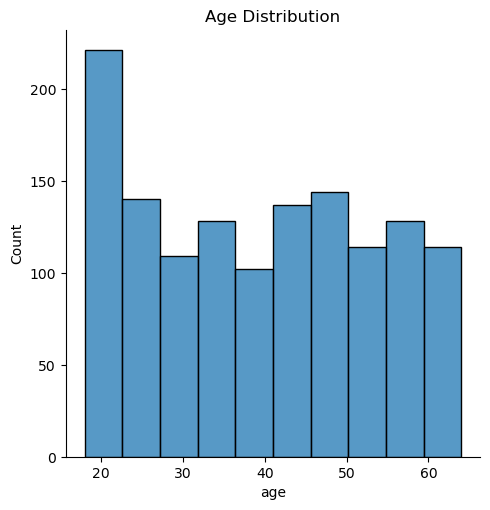

In [57]:
## Age Distribution ##
sns.displot(data = df['age'], bins = 10)
plt.title('Age Distribution')

Slope of the regression line: 393.8558912099735


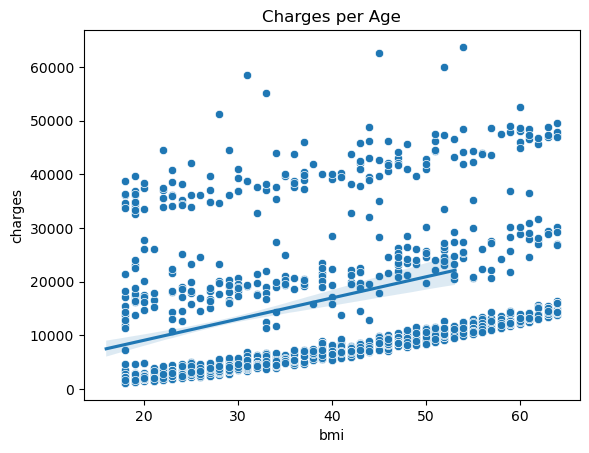

In [58]:
sns.scatterplot(x = 'age', y = 'charges', data = df)
sns.regplot(x='bmi', y='charges', data=df, scatter=False)
plt.title('Charges per Age')

print("Slope of the regression line:", slope)

In [ ]:
""" Changing categorical values to numerical values ##
def change_gender(x):
    if x == 'male':
        return 0
    else:
        return 1

def change_smoker(x):
    if x == 'yes':
        return 0
    else:
        return 1
    
df['sex']= df['sex'].apply(lambda x: change_gender(x))
df['smoker']=df['smoker'].apply(lambda x: change_smoker(x)) """